Markdown

📊 Análisis de Datos de Ventas con Python

Este notebook presenta un análisis exploratorio de datos de ventas simulados. Se aplican técnicas de limpieza, agrupación y visualización para obtener insights sobre productos, regiones y comportamiento mensual.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/ventas.csv')
df['Fecha pedido'] = pd.to_datetime(df['Fecha pedido'])
plt.subplots_adjust(bottom=0.3)

<Figure size 640x480 with 0 Axes>

Markdown
## 🔍 Limpieza de datos

Eliminamos valores nulos y convertimos la columna de fechas al formato datetime.

In [14]:
df.dropna(inplace=True)
print(f"Total de registros limpios: {len(df)}")

Total de registros limpios: 1000


Markdown
## 📦 Ventas por producto

Agrupamos las ventas por tipo de producto y visualizamos los totales.

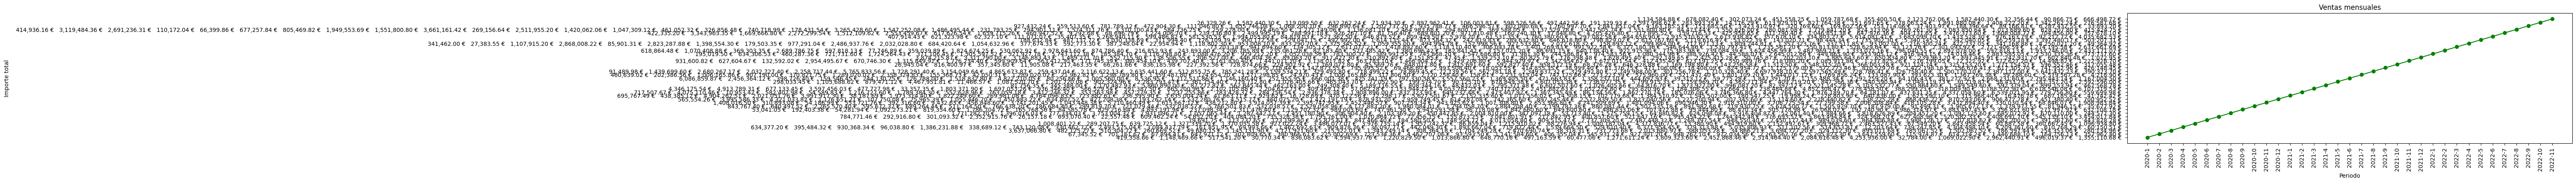

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(ventas_mensuales['Periodo'], ventas_mensuales['Importe venta total'], marker='o', linestyle='-', color='green')
plt.title('Ventas mensuales')
plt.ylabel('Importe total')
plt.xlabel('Periodo')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.35)  # espacio extra para etiquetas
plt.show()

Markdown
## 🌎 Ventas por región

Visualizamos la distribución de ventas por región usando un gráfico de pastel.

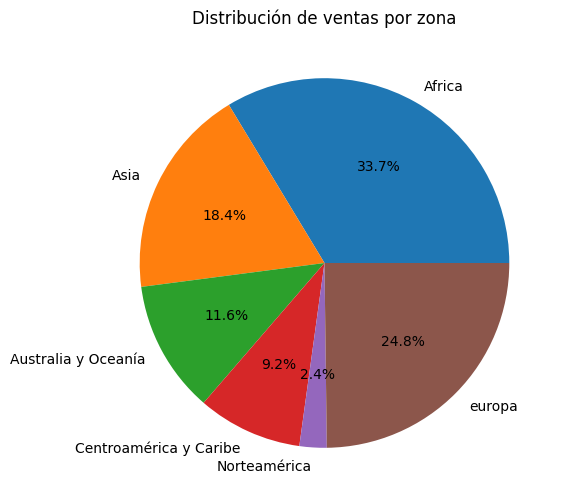

In [25]:
ventas_por_region = df.groupby('Zona')['Importe venta total'].sum()
ventas_por_region.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribución de ventas por zona')
plt.ylabel('')
plt.show()

In [24]:
def limpiar_importe(valor):
    try:
        valor = str(valor).strip().replace('€', '').replace('.', '').replace(',', '.')
        return float(valor)
    except:
        return None  # o 0 si prefieres

df['Importe venta total'] = df['Importe venta total'].apply(limpiar_importe)

In [22]:
def limpiar_importe(valor):
    try:
        limpio = (
            str(valor)
            .strip()
            .replace('€', '')
            .replace('.', '')
            .replace(',', '.')
        )
        return float(limpio)
    except:
        return None

df['Importe venta total'] = df['Importe venta total'].apply(limpiar_importe)

Markdown
## 📅 Ventas mensuales

Analizamos la evolución de ventas por mes para detectar tendencias.

In [ ]:
df['Mes'] = df['Fecha'].dt.to_period('M')
ventas_mensuales = df.groupby('Mes')['Ventas'].sum()
ventas_mensuales.plot(marker='o', linestyle='-', color='green')
plt.title('Ventas mensuales')
plt.ylabel('Ventas')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
ventas_por_region = df.groupby('Zona')['Importe venta total'].sum()
print(ventas_por_region)
print(ventas_por_region.dtype)  # debe ser float64

Zona
Africa                    5.695286e+10
Asia                      3.114811e+10
Australia y Oceanía       1.960784e+10
Centroamérica y Caribe    1.551628e+10
Norteamérica              4.022113e+09
europa                    4.196091e+10
Name: Importe venta total, dtype: float64
float64


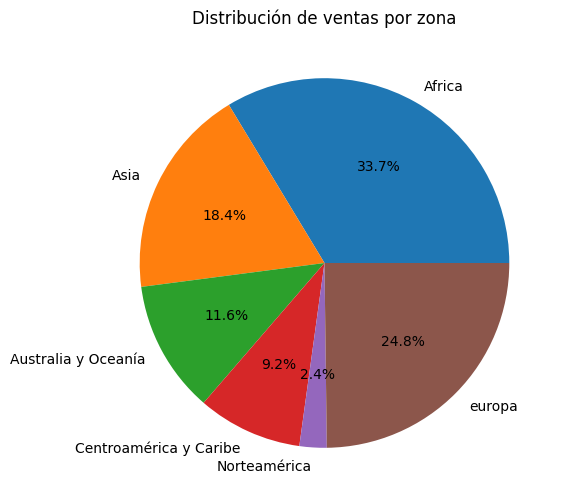

In [31]:
ventas_por_region.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Distribución de ventas por zona')
plt.ylabel('')
plt.show()

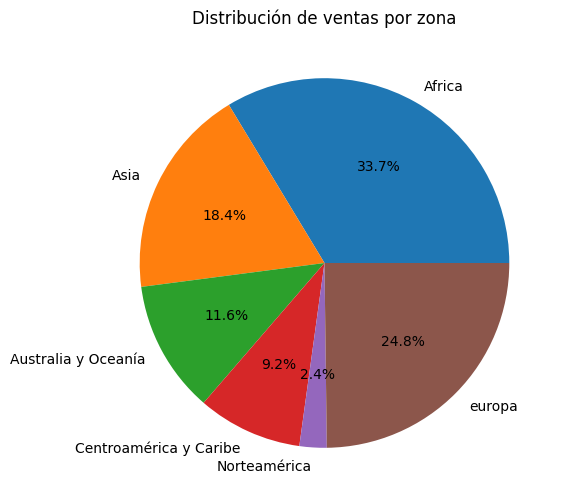

In [32]:
df_region = ventas_por_region.reset_index()
plt.figure(figsize=(6,6))
plt.pie(df_region['Importe venta total'], labels=df_region['Zona'], autopct='%1.1f%%')
plt.title('Distribución de ventas por zona')
plt.show()